<a href="https://colab.research.google.com/github/kshwan95/Machine-Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2, random_state=42
)

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu',
                              padding='same',input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:

model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu',
                              padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               3

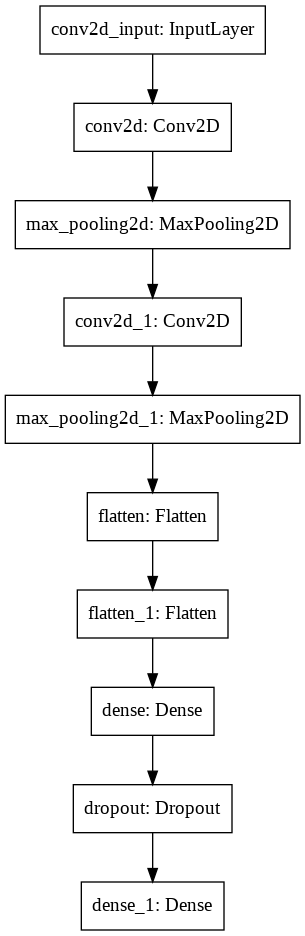

In [8]:
keras.utils.plot_model(model)

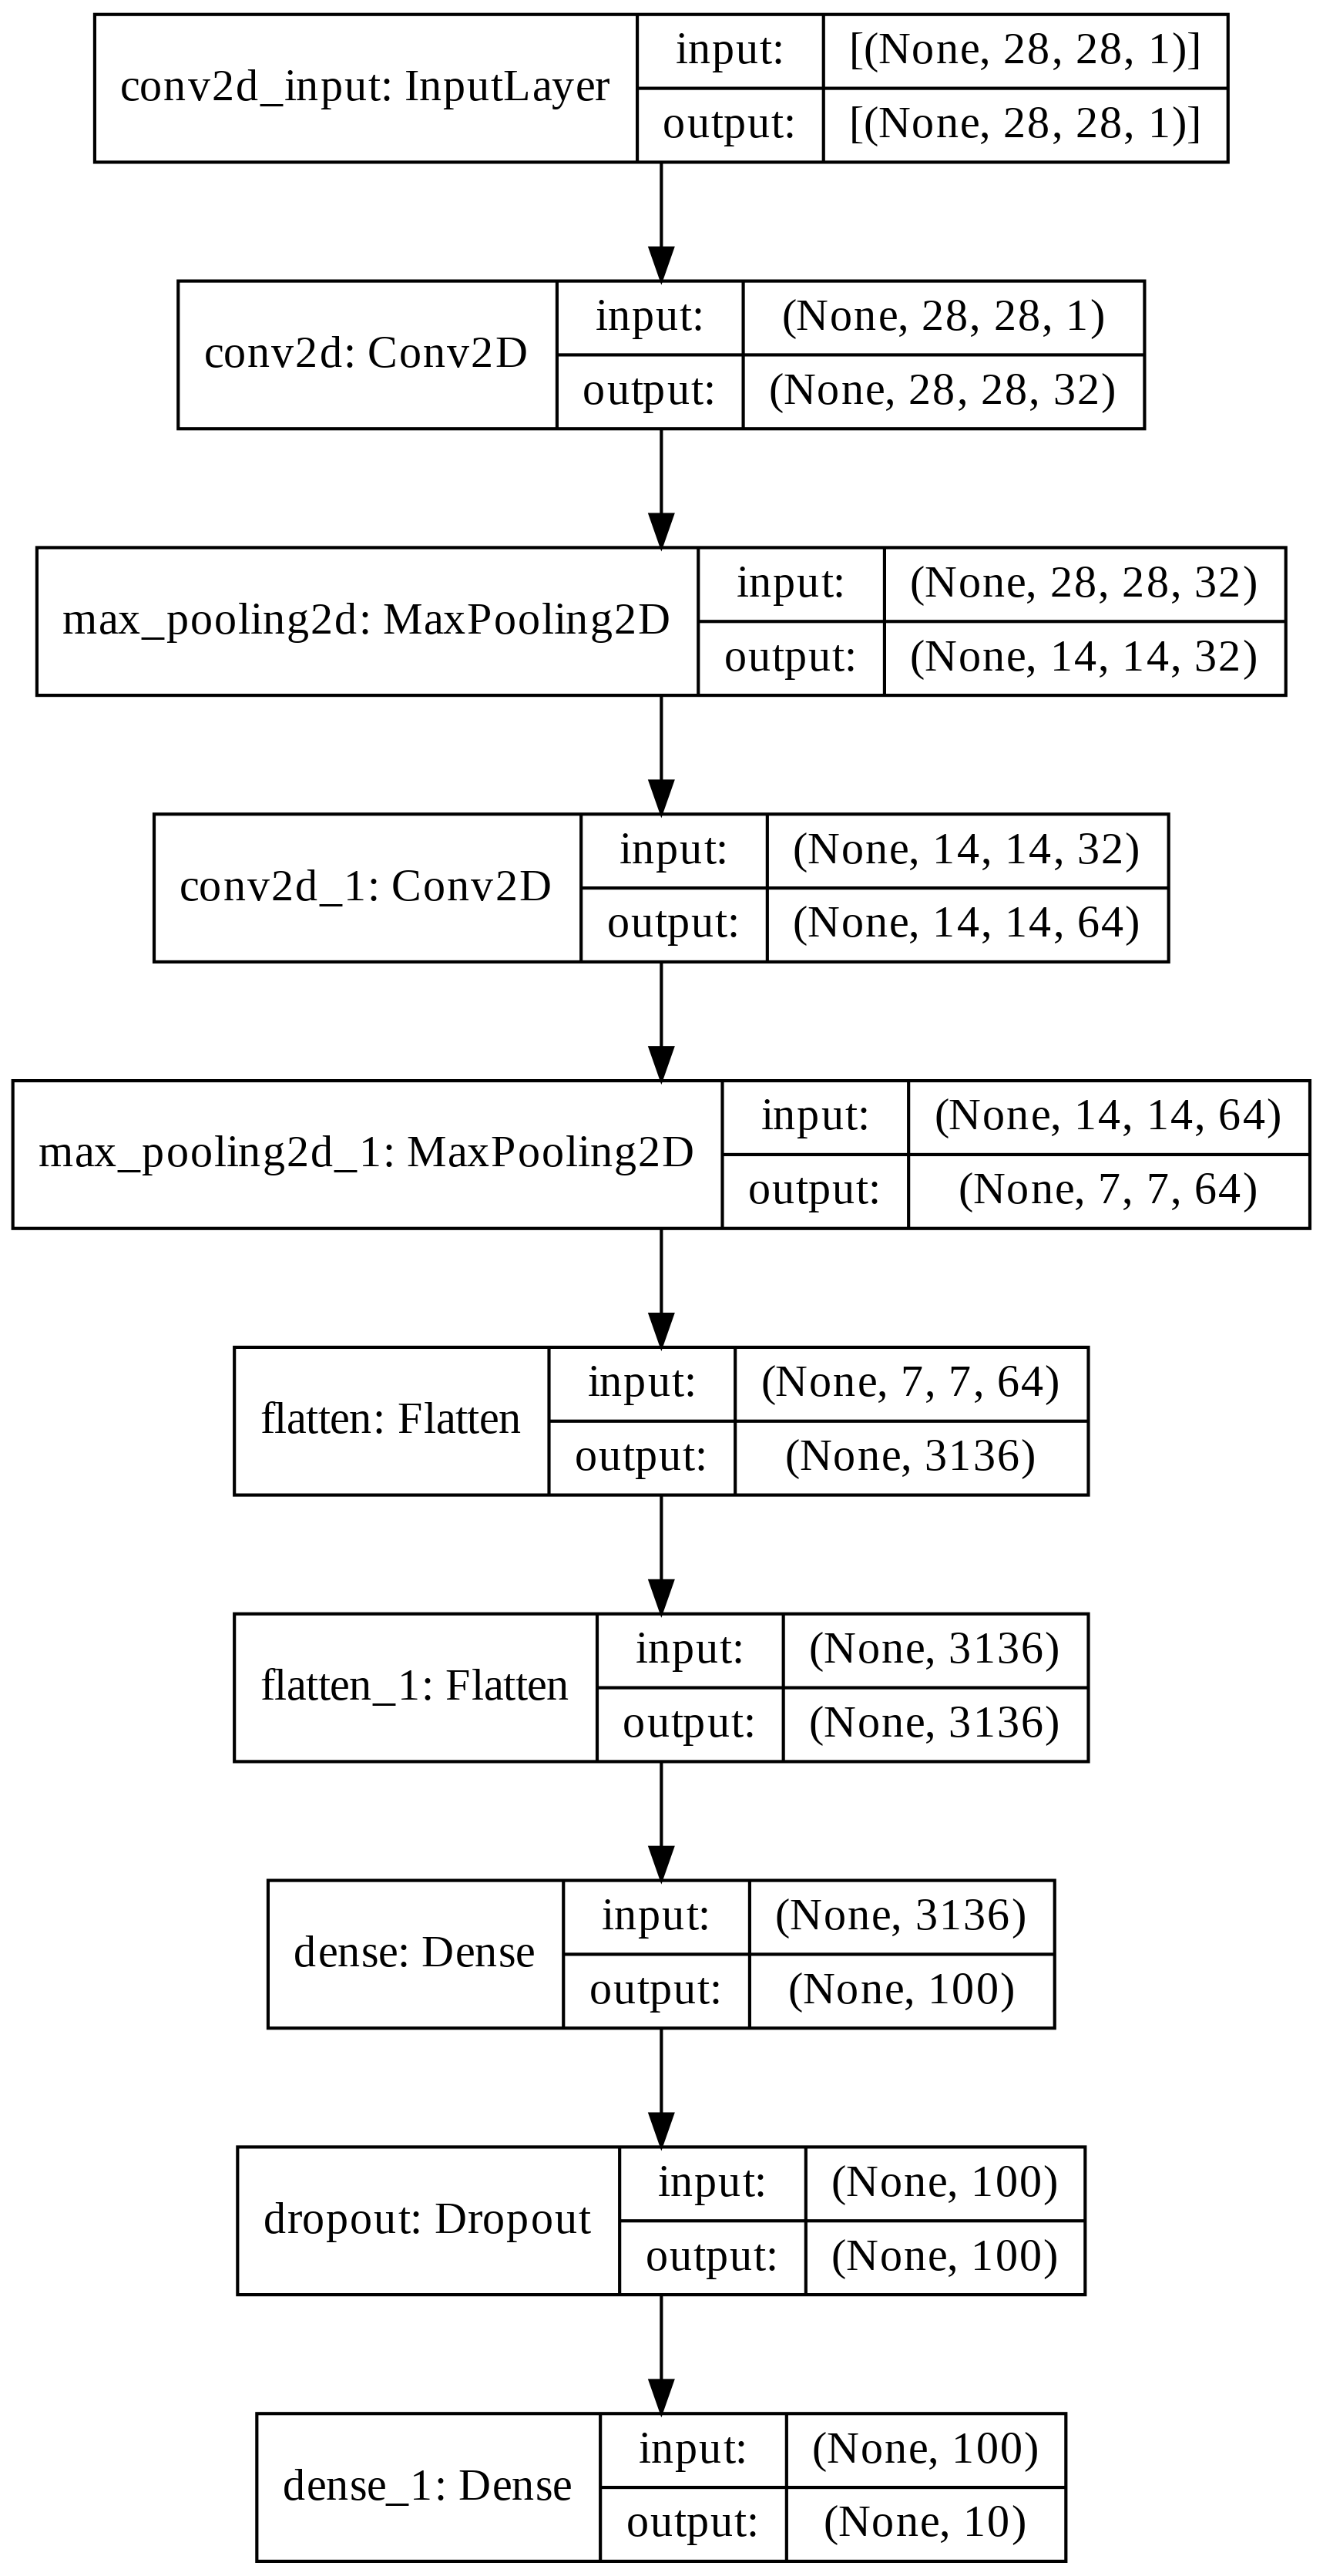

In [9]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5223 - accuracy: 0.8124 - val_loss: 0.3311 - val_accuracy: 0.8783
Epoch 2/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3490 - accuracy: 0.8751 - val_loss: 0.2815 - val_accuracy: 0.8948
Epoch 3/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2991 - accuracy: 0.8928 - val_loss: 0.2535 - val_accuracy: 0.9080
Epoch 4/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2630 - accuracy: 0.9045 - val_loss: 0.2405 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2409 - accuracy: 0.9115 - val_loss: 0.2299 - val_accuracy: 0.9146
Epoch 6/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2198 - accuracy: 0.9207 - val_loss: 0.2214 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2032 - accuracy: 0.9259 - val_loss: 0.2136 -

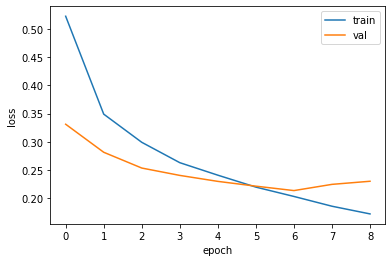

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 4s 12ms/step - loss: 0.2136 - accuracy: 0.9201


[0.2136206477880478, 0.9200833439826965]

<function matplotlib.pyplot.show>

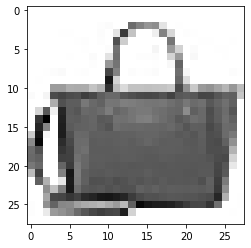

In [13]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show

In [14]:
preds =model.predict(val_scaled[0:1])
print(preds)

[[5.1906065e-15 2.9754783e-22 1.4872732e-18 1.0956310e-17 2.2682829e-15
  9.4864641e-16 7.0516276e-15 9.1604972e-16 1.0000000e+00 5.5861062e-17]]


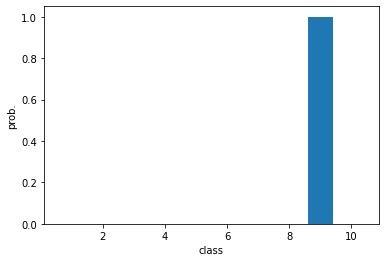

In [15]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2300 - accuracy: 0.9182


[0.2299794703722, 0.9182000160217285]